<img src='https://drive.google.com/uc?id=1tqYIvII8lJ_FnqE6ugS21n4s93kMwTLy' />

## Machine Learning
## School of Computing and Engineering, University of West London
## Massoud Zolgharni

# Tutorial: Classification: K-NN

Start by mounting Google Drive locally

In [ ]:
# Importing drive method from colab for accessing google drive
from google.colab import drive

# Mounting drive: this will require authentication : Follow the steps as guided
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Dataset

In [ ]:
# generate 2 class dataset
#from sklearn.datasets import make_classification
#X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_informative=2, n_classes=2, weights=[1,1], random_state=1)
#f = open("data_Seminar.txt", 'w')
#for p in list(range(0,len(X))):
#    f.write('%.2f\t %.2f\t %.2f\n' % (X[p,0], X[p,1], y[p]))
#f.close()

import numpy as np

Foldername = '/content/gdrive/My Drive/Colab Notebooks/UWL/ML_L6/'
DATA = np.loadtxt(Foldername+'data_Seminar-Supervised-Classification-K-NN-Performance-Metrics.txt')


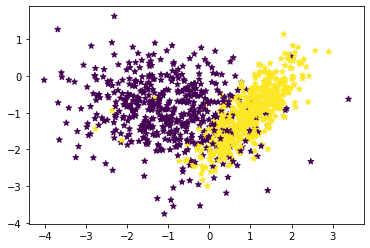

In [ ]:
import matplotlib.pyplot as plt

X = DATA[:, 0:2]
y = DATA[:, 2]
#print( X.shape, y.shape)
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, marker='*')
plt.show()

Split into train/test sets

In [ ]:
from sklearn.model_selection import train_test_split
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.2, random_state=2)

Train a classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(trainX, trainy)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(testy, model.predict(testX))

TP = cnf_matrix[0][0]
FP = cnf_matrix[0][1]
FN = cnf_matrix[1][0]
TN = cnf_matrix[1][1]
print('TP = ', TP)
print('FP = ', FP)
print('FN = ', FN)
print('TN = ', TN)

print('\nPerformance Metrics')
#Sensitivity, hit rate, recall, or true positive rate
print('TPR = Sensitivity = recal = '+'{:.2f}'.format(TP/(TP+FN)))
# Specificity or true negative rate
print('TNR = Specificity = '+'{:.2f}'.format(TN/(TN+FP)))
# Precision or positive predictive value
print('PPV = Precision = '+'{:.2f}'.format(TP/(TP+FP)))
# Overall accuracy
print('ACC = Accuracy = '+'{:.2f}'.format((TP+TN)/(TP+FP+FN+TN)))

TP =  89
FP =  19
FN =  7
TN =  85

Performance Metrics
TPR = Sensitivity = recal = 0.93
TNR = Specificity = 0.82
PPV = Precision = 0.82
ACC = Accuracy = 0.87


In [ ]:
# print('\nPerformance Metrics using sklearn')
# from sklearn.metrics import accuracy_score
# print('accuracy = '+'{:.2f}'.format(accuracy_score(testy, model.predict(testX))))
# print('accuracy = '+'{:.2f}'.format(model.score(testX, testy)))

# from sklearn.metrics import precision_score
# print('precision = '+'{:.2f}'.format(precision_score(testy, model.predict(testX), pos_label=1)))

# from sklearn.metrics import recall_score
# print('recall = '+'{:.2f}'.format(recall_score(testy, model.predict(testX), pos_label=1)))

from sklearn.metrics import f1_score
print('f1_score = '+'{:.2f}'.format(f1_score(testy, model.predict(testX), pos_label=1)))

# from sklearn.metrics import classification_report
# print(classification_report(testy, model.predict(testX), target_names=['Negative', 'Positive']))

f1_score = 0.87


In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
#    if normalize:
#        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#        print("Normalized confusion matrix")
#    else:
#        print('Confusion matrix')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    import itertools
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Plot confusion matrix

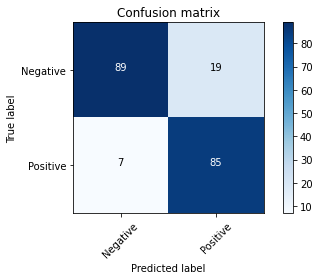

In [ ]:
class_names=['Negative', 'Positive']
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')

## Plot normalized confusion matrix
#plt.figure()
#plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True, title='Normalized confusion matrix')

Compute ROC curve and ROC area


Area Under The Curve: AUC = 0.913



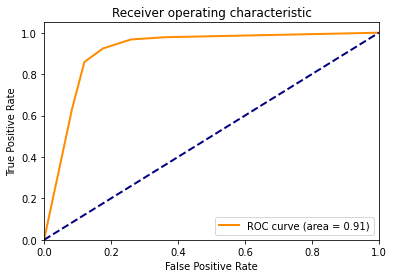

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
## predict probabilities
probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate roc curve
fpr, tpr, thresholds = roc_curve(testy, probs)
# calculate AUC
auc = roc_auc_score(testy, probs)
print('\nArea Under The Curve: AUC = %.3f\n' % auc)


plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()